## Fancy Plot Seaborn

In [23]:
import os
import pandas as pd
import numpy  as np
import seaborn as sns
from pathlib   import Path
import matplotlib.pyplot as plt

In [2]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


In [6]:
# import dataset
path_dataset = path_root / 'dataset/pollution_wide.csv'
pollution  = pd.read_csv(path_dataset)
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


### Highlight a point

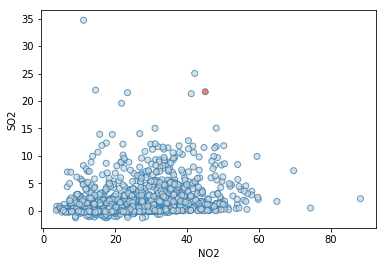

In [7]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

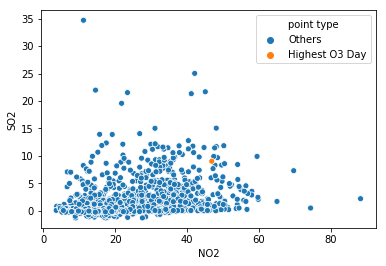

In [9]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point type',
                data = houston_pollution)
plt.show()

### Comparing Groups via KDE

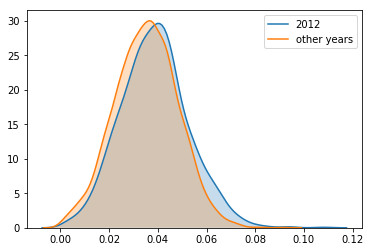

In [11]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

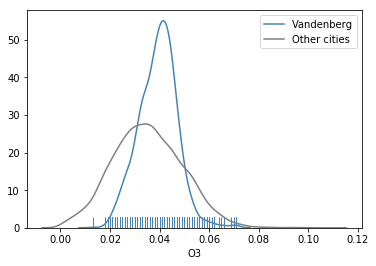

In [12]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg',
                # Turn of the histogram and color blue to stand out
               hist = False, 
             color = 'steelblue',  
               # Turn on rugplot
               rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
             label = 'Other cities',
               # Turn off histogram and color gray
               hist = False,
             color = 'gray')
plt.show()

### Add annotation

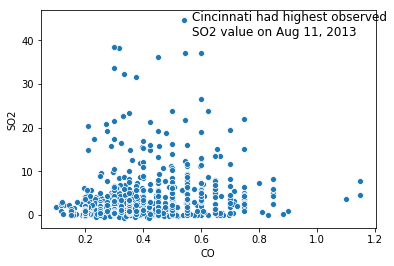

In [14]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

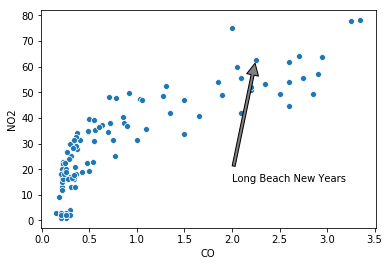

In [15]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2', data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

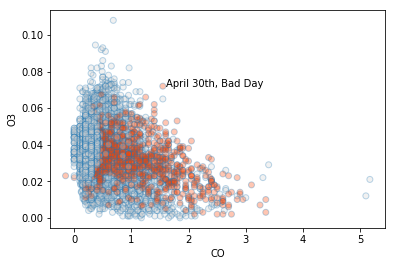

In [16]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

### Color turning

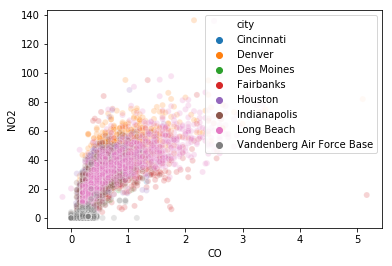

In [19]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)
plt.show()

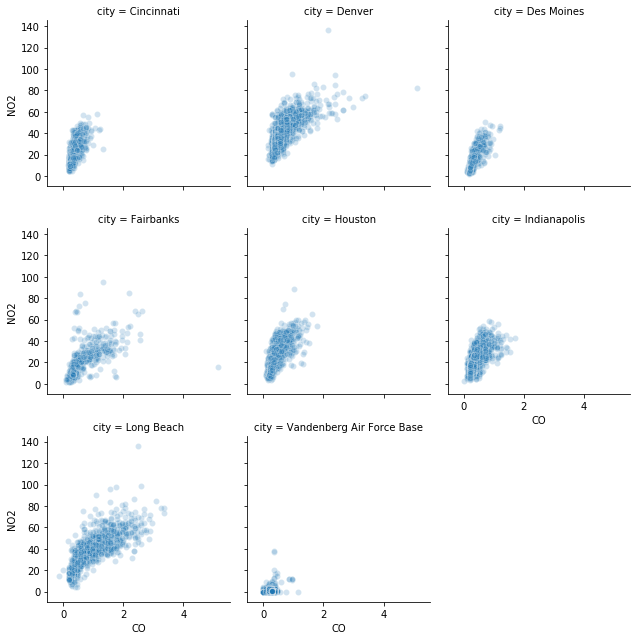

In [20]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot,'CO', 'NO2', alpha = 0.2)
plt.show()

### Bar chart

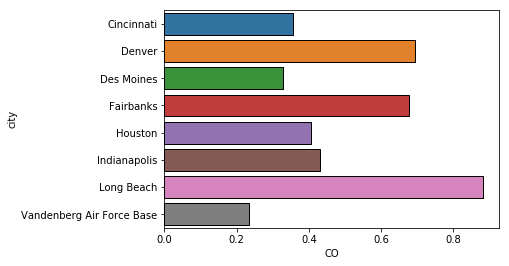

In [24]:
sns.barplot(y = 'city', 
            x = 'CO', 
            estimator = np.mean, 
            ci = False, 
            data = pollution, # Add a border to the bars
            edgecolor = 'black')
plt.show()

### Making a custom palette

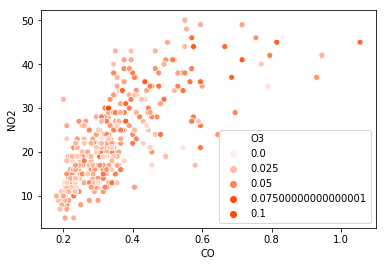

In [25]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

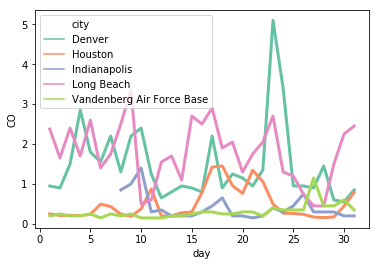

In [29]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

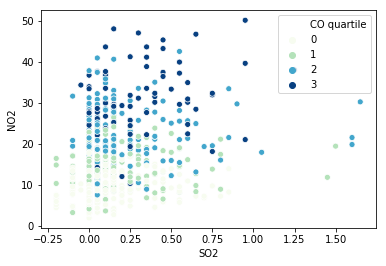

In [31]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()